**Amplified Spontaneous Emission** : Data Analysis

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
pd.set_option('display.max_rows', None)

In [42]:
# === Define Gaussian and Double Gaussian functions ===
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Gaussian sum function
def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return (A1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2)) +
            A2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2)))

**Compare Power v/s Spectral Parameters for Same Sample Concentration**

In [43]:
# File Name Parameters
name="ASE_Merin - 18062025_SC1803_"
middle=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
lname="P1s.csv"
powers=np.arange(0,34,2)
#sample=1

In [44]:
#Make initial Guess from Experimental Observation
centerbroad=590
centerpeak=640
widthbroad=100
widthpeak=5

In [45]:
finaldatalist=[]

for element in middle:
    sample=element
    #Return Values
    peakfwhms=[]
    broadfwhms=[]
    peakamp=[]
    broadamp=[]
    peakmean=[]
    broadmean=[]
    #Load each file
    concmatrix=pd.DataFrame()

    for i in range(0,len(powers)):
        filename = "D:/Academic/Pythonfiles/ASE/InputFiles/"+name+str(sample)+lname
        data = np.loadtxt(filename, delimiter=',',skiprows=1)
        x_data = data[:, 0]  # Wavelength
        y_data=data[:,i+1]
        
        # Initial guesses: [A1, mu1, sigma1, A2, mu2, sigma2]
        initial_guess = [max(y_data), centerbroad, widthbroad,  # Background
                         max(y_data), centerpeak, widthpeak]  # Shoulder peak
    
        #Setting bounds for values to avoid negative values
        lower_bounds = [0, min(x_data), 1,     0, min(x_data), 1]     # A1, mu1, sigma1, A2, mu2, sigma2
        upper_bounds = [np.inf, max(x_data), max(x_data)/2, np.inf, max(x_data), max(x_data)/2]
    
        # Fit the data
        popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess,bounds=(lower_bounds, upper_bounds))
    
        # Extract fitted parameters
        A1, mu1, sigma1, A2, mu2, sigma2 = popt
        fwhm_shoulder = 2.355 * sigma2
        fwhm_broad=2.355 * sigma1

        #Special Attention to the Shoulder peak to give exact values of the peak values
        background_at_shoulder_peak = gaussian(mu2, A1, mu1, sigma1)
        actual_shoulder_peak_height = A2 + background_at_shoulder_peak
    
        #Appending return values
        peakfwhms.append(fwhm_shoulder)
        broadfwhms.append(fwhm_broad)
        peakamp.append(actual_shoulder_peak_height)
        broadamp.append(A1)
        peakmean.append(mu2)
        broadmean.append(mu1)

    #append to Dataframe
    concmatrix["Concentration (V/V %)"]=[sample]*len(powers)
    concmatrix["Power (W)"]=powers
    concmatrix["FWHM_Peak (nm)"]=peakfwhms
    concmatrix["FWHM_Broad (nm)"]=broadfwhms
    concmatrix["Amplitude_Peak (ar.u)"]=peakamp
    concmatrix["Amplitude_Broad (ar.u)"]=broadamp
    
    #append the table each loop
    finaldatalist.append(concmatrix)
    
final_dataframe = pd.concat(finaldatalist, ignore_index=True)

In [46]:
final_dataframe

,Concentration (V/V %),Power (W),FWHM_Peak (nm),FWHM_Broad (nm),Amplitude_Peak (ar.u),Amplitude_Broad (ar.u)
0,0.1,0,2.355122,942.575255,271.109838,286.849522
1,0.1,2,112.446438,846.864248,1041.821373,344.449365
2,0.1,4,10.820012,174.127583,1709.896714,1542.789710
3,0.1,6,10.695469,154.432473,2238.019635,2024.988786
4,0.1,8,10.325842,154.344088,2755.877245,2475.451613
5,0.1,10,10.845132,149.451111,3036.105267,2579.255029
6,0.1,12,11.105557,148.452406,3477.297356,2804.225421
7,0.1,14,11.304547,147.935234,3896.707844,3026.048492
8,0.1,16,11.528477,146.447781,4246.673122,3185.843802
9,0.1,18,11.857841,146.634150,4558.760886,3294.712257


In [47]:
final_dataframe.to_csv("D:/Academic/Pythonfiles/ASE/OutputFiles/18062025-Results/Consolidated_Results.csv", index=False)

In [48]:
values=final_dataframe[final_dataframe["Power (W)"]==4]["FWHM_Peak (nm)"].tolist()

In [49]:
concentrations=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
powers=[4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]

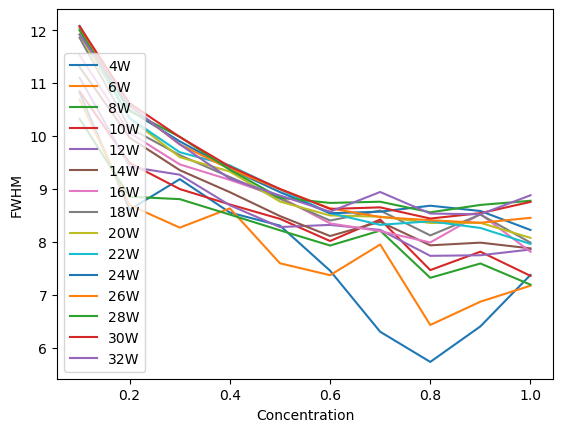

In [50]:
for p in powers:
    pvalues=final_dataframe[final_dataframe["Power (W)"]==p]["FWHM_Peak (nm)"].tolist()
    plt.plot(concentrations,pvalues,label=str(p)+"W")
plt.xlabel("Concentration")
plt.ylabel("FWHM")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (15,) and (17,)

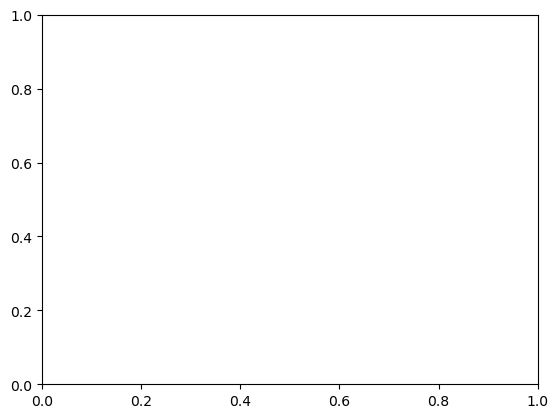

In [51]:
for c in concentrations:
    cvalues=final_dataframe[final_dataframe["Concentration (V/V %)"]==c]["FWHM_Peak (nm)"].tolist()
    plt.plot(powers[2:],cvalues,label=str(c)+"V/V%")
plt.xlabel("Power")
plt.ylabel("FWHM")
plt.legend()
plt.show()

In [ ]:
# Plot one sample diagram
plt.figure()
plt.plot(x_data, y_data, 'b.', label='Data')
plt.plot(x_data, double_gaussian(x_data, *popt), 'r-', label='Fit')
plt.axvline(mu1, color='g', linestyle='--', label=f'Broad Emission at: {mu1:.2f} nm')
plt.axvline(mu2, color='black', linestyle='--', label=f'Peak at: {mu2:.2f}')
plt.title(f'Shoulder Peak FWHM: {fwhm_shoulder:.2f}')
plt.legend()
plt.show()

In [ ]:
#Plot and save the results for Broad Emission
fig1, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig1.suptitle(name+str(sample)+": Broad Emission Characteristics")
# Plot on each subplot
axes[0].plot(powers[2:], broadfwhms[2:])
axes[0].scatter(powers[2:], broadfwhms[2:])
axes[0].set_xlabel("Power (W)")
axes[0].set_ylabel("FWHM (n.m)")
axes[0].set_title('Power v/s FWHM')
axes[0].grid(True)

axes[1].plot(powers[2:], broadmean[2:])
axes[1].scatter(powers[2:], broadmean[2:])
axes[1].set_xlabel("Power (W)")
axes[1].set_ylabel("Peak Position (n.m)")
axes[1].set_title('Power v/s Peak Position')
axes[1].grid(True)

axes[2].plot(powers[2:], broadamp[2:])
axes[2].scatter(powers[2:], broadamp[2:])
axes[2].set_xlabel("Power (W)")
axes[2].set_ylabel("Maximum Intensity (a.u)")
axes[2].set_title('Power v/s Maximum Amplitude')
axes[2].grid(True)

#Set the ticking for the plots
for ax in axes.ravel():
    ax.set_xticks(powers[2:max(powers):2])

# Adjust spacing and Save the figure
plt.tight_layout()
plt.savefig('D:/Academic/Pythonfiles/ASE/OutputFiles/18062025-Results/'+name+str(sample)+"Broad"+".png", dpi=300, bbox_inches='tight')

In [ ]:
#Plot and save the results for Shoulder Peak
fig2, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig2.suptitle(name+str(sample)+": Shoulder Peak Characteristics")
# Plot on each subplot
axes[0].plot(powers[2:], peakfwhms[2:])
axes[0].scatter(powers[2:], peakfwhms[2:])
axes[0].set_xlabel("Power (W)")
axes[0].set_ylabel("FWHM (n.m)")
axes[0].set_title('Power v/s FWHM')
axes[0].grid(True)

axes[1].plot(powers[2:], peakmean[2:])
axes[1].scatter(powers[2:], peakmean[2:])
axes[1].set_xlabel("Power (W)")
axes[1].set_ylabel("Peak Position (n.m)")
axes[1].set_title('Power v/s Peak Position')
axes[1].grid(True)

axes[2].plot(powers[2:], peakamp[2:])
axes[2].scatter(powers[2:], peakamp[2:])
axes[2].set_xlabel("Power (W)")
axes[2].set_ylabel("Maximum Intensity (a.u)")
axes[2].set_title('Power v/s Maximum Amplitude')
axes[2].grid(True)

#Set the ticking for the plots
for ax in axes.ravel():
    ax.set_xticks(powers[2:max(powers):2])

# Adjust spacing and Save the figure
plt.tight_layout()
plt.savefig('D:/Academic/Pythonfiles/ASE/OutputFiles/18062025-Results/'+name+str(sample)+"Peak"+".png", dpi=300, bbox_inches='tight')

**This is the end of this Analysis**